# 0-Projeto EDA grupo 3

André Alves Teixeira

Daniel Mota

Henrique Inácio

Kleiton Rocha De Oliveira

Matheus Rocha Dos Santos Rangel

Wendrik De Oliveira Santana

# 1-Introdução


Iremos fazer uma análise sobre o DataSet contendo informções sobre os alguns filmes cadastrados no IMDb.

Nosso objetivo é ver como as variáveis se relacionam com a variável Gross (receita bruta)

Base de dados se encontra no Kagle pelo endereço:

https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline

In [101]:
df = pd.read_csv('data/imdb_top_1000.csv')

In [102]:
# Vizualização das 5 primeiras linhas do dataset.

df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [103]:
# Vizualização das 5 últimas linhas do dataset.

df.tail()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [104]:
# Verificando shape do dataset (linhas, colunas).

df.shape

(1000, 16)

In [105]:
# Verificando informações do dataset (colunas, quantidade de non-null e tipo do dado).

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Avaliação:
1. Released_Year pode ser alterado pata int, para facilitar categorização e análise.
2. Runtime pode ser alterado pata int, para facilitar categorização e análise.
3. Gross pode ser alterado pata float, para facilitar categorização e análise.
4. Colunas 'Poster_Link' e 'Overview' não serão úteis para esta análise.

In [106]:
# Transformando tipo de Released_Year para int64, foi encontrado um valor não numérico, 'PG'
# Localizado o valor, verificado e pesquisado o filme. Apollo 13 foi lançado em: 1995

df_pg = df.loc[df['Released_Year'] == 'PG']
df_pg.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [107]:
# Substituindo o dado correto em 'Released_Year' de Apollo 13.

df.loc[[966], ['Released_Year']] = '1995'
df.loc[966]

Poster_Link      https://m.media-amazon.com/images/M/MV5BNjEzYj...
Series_Title                                             Apollo 13
Released_Year                                                 1995
Certificate                                                      U
Runtime                                                    140 min
Genre                                    Adventure, Drama, History
IMDB_Rating                                                    7.6
Overview         NASA must devise a strategy to return Apollo 1...
Meta_score                                                    77.0
Director                                                Ron Howard
Star1                                                    Tom Hanks
Star2                                                  Bill Paxton
Star3                                                  Kevin Bacon
Star4                                                  Gary Sinise
No_of_Votes                                                 26

In [108]:
# Alterando o tipo de 'Released_Year' para int64.

df['Released_Year'] = df['Released_Year'].astype(dtype = 'int64')

In [109]:
# Transformando as colunas 'Runtime' em int.

df['Runtime'] = df['Runtime'].str.split(' ', expand=True)[0]
df = df.astype({"Runtime":'int'})

In [110]:
# Tranformando a coluna 'Gross' em tipo float para avaliar.

df['Gross'] = df['Gross'].str.replace(',','')
df['Gross'] = df['Gross'].astype(dtype = 'float64')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [111]:
# Avaliamos que as colunas 'Poster Link' e 'Overview' não serão úteis para esta análise. Portanto, serão excluídas para evitar desperdício.

columns = ['Poster_Link', 'Overview']
df = df.drop(columns, axis=1)

In [112]:
#df['Genre'] = df['Genre'].str.split(', ', expand=True)[0]

In [113]:
# Verificando informações do dataset após as alterações de tipo.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   int32  
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    float64
dtypes: float64(3), int32(1), int64(2), object(8)
memory usage: 105.6+ KB


In [114]:
# Verificando  a % de valores null para cada variável.

(df.isnull().sum() / df.shape[0])*100

Series_Title      0.0
Released_Year     0.0
Certificate      10.1
Runtime           0.0
Genre             0.0
IMDB_Rating       0.0
Meta_score       15.7
Director          0.0
Star1             0.0
Star2             0.0
Star3             0.0
Star4             0.0
No_of_Votes       0.0
Gross            16.9
dtype: float64

In [115]:
# Removendo as linhas de filmes que não possuem valor de arrecadação, que é a nossa variável alvo.

df = df.dropna(subset = ['Gross'])

In [116]:
# Verificando quantidade de null após modificação.

(df.isnull().sum() / df.shape[0])*100

Series_Title     0.000000
Released_Year    0.000000
Certificate      5.535499
Runtime          0.000000
Genre            0.000000
IMDB_Rating      0.000000
Meta_score       9.747292
Director         0.000000
Star1            0.000000
Star2            0.000000
Star3            0.000000
Star4            0.000000
No_of_Votes      0.000000
Gross            0.000000
dtype: float64

In [117]:
# Verificando quantidade de null após modificação.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 0 to 997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   831 non-null    object 
 1   Released_Year  831 non-null    int64  
 2   Certificate    785 non-null    object 
 3   Runtime        831 non-null    int32  
 4   Genre          831 non-null    object 
 5   IMDB_Rating    831 non-null    float64
 6   Meta_score     750 non-null    float64
 7   Director       831 non-null    object 
 8   Star1          831 non-null    object 
 9   Star2          831 non-null    object 
 10  Star3          831 non-null    object 
 11  Star4          831 non-null    object 
 12  No_of_Votes    831 non-null    int64  
 13  Gross          831 non-null    float64
dtypes: float64(3), int32(1), int64(2), object(8)
memory usage: 94.1+ KB


In [118]:
# Tipos alterados e NaN removido de 'Gross' (variável alvo).
# Caso seja necessário mais alguma alteração, cada analista avalia e justifica.

# Kleiton

In [119]:
df.groupby(['Director'])['Gross'].sum().to_frame().sort_values('Gross',ascending=False).head(10)

,Gross
Director,
Steven Spielberg,2.478133e+09
Anthony Russo,2.205039e+09
Christopher Nolan,1.937454e+09
James Cameron,1.748237e+09
Peter Jackson,1.597312e+09
J.J. Abrams,1.423171e+09
Brad Bird,1.099628e+09
Robert Zemeckis,1.049446e+09
David Yates,9.789537e+08


<AxesSubplot:xlabel='Director', ylabel='Gross'>

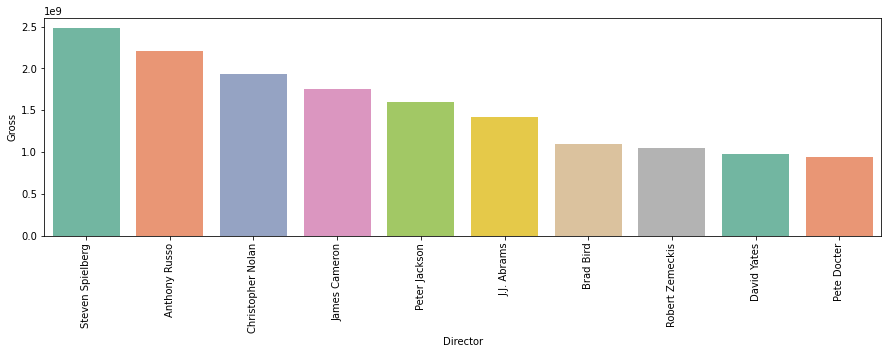

In [120]:
rcParams['figure.figsize'] = 15,4
plt.xticks(rotation=90)
sns.barplot(data= df.groupby(['Director'])['Gross'].sum().to_frame().sort_values('Gross',ascending=False).head(10).reset_index(),
            x='Director',y='Gross',palette=sns.color_palette("Set2"))

<AxesSubplot:xlabel='Released_Year', ylabel='Gross'>

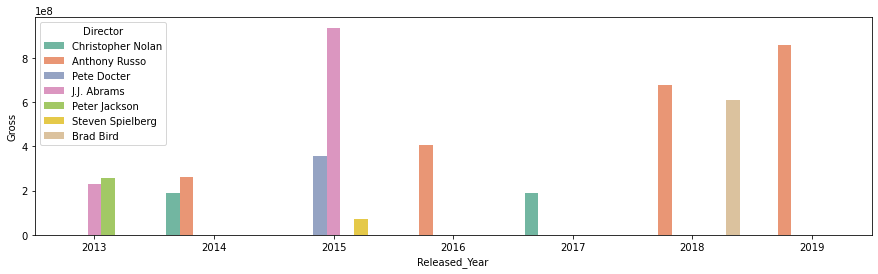

In [121]:
directors = df.groupby(['Director'])['Gross'].sum().to_frame().sort_values('Gross',ascending=False).head(10).reset_index()['Director'].to_list()

dby = df[(df['Director'].isin(directors)) & (df['Released_Year'] >=2013)].copy()

sns.color_palette("Set2")
rcParams['figure.figsize'] = 15,4
sns.barplot(data = dby, x='Released_Year',y='Gross',hue='Director',palette=sns.color_palette("Set2"))
#df.groupby(['Released_Year','Director'])['Gross'].sum().to_frame().sort_values('Gross',ascending=False).head(10)

In [122]:
#Pesquisar filmes de J.J. Abrams

df[(df['Director'] == 'J.J. Abrams')&(df['Released_Year']>=2013)]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
477,Star Wars: Episode VII - The Force Awakens,2015,U,138,"Action, Adventure, Sci-Fi",7.9,80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0
746,Star Trek Into Darkness,2013,UA,132,"Action, Adventure, Sci-Fi",7.7,72.0,J.J. Abrams,Chris Pine,Zachary Quinto,Zoe Saldana,Benedict Cumberbatch,463188,228778661.0


In [123]:
#Pesquisar filmes de J.J. Abrams

df[(df['Director'] == 'Anthony Russo')&(df['Released_Year']>=2013)]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
59,Avengers: Endgame,2019,UA,181,"Action, Adventure, Drama",8.4,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0
60,Avengers: Infinity War,2018,UA,149,"Action, Adventure, Sci-Fi",8.4,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.0
583,Captain America: Civil War,2016,UA,147,"Action, Adventure, Sci-Fi",7.8,75.0,Anthony Russo,Joe Russo,Chris Evans,Robert Downey Jr.,Scarlett Johansson,663649,408084349.0
737,Captain America: The Winter Soldier,2014,UA,136,"Action, Adventure, Sci-Fi",7.7,70.0,Anthony Russo,Joe Russo,Chris Evans,Samuel L. Jackson,Scarlett Johansson,736182,259766572.0


# Wendrik

In [124]:
#Substituir NaN pela mediana no Meta_score
df["Meta_score"] = df["Meta_score"].replace(np.nan, df['Meta_score'].median())

In [125]:
#Dividir em intervalos e analisar a media de arrecadação do IMDB
df['faixa_avaliacao'] = np.nan
df.loc[(pd.to_numeric(df['IMDB_Rating'])>=7.5) & (pd.to_numeric(df['IMDB_Rating'])<7.8),'faixa_avaliacao'] = '7.5-7.8'
df.loc[(pd.to_numeric(df['IMDB_Rating'])>=7.8) & (pd.to_numeric(df['IMDB_Rating'])<8.1),'faixa_avaliacao'] = '7.8-8.1'
df.loc[(pd.to_numeric(df['IMDB_Rating'])>=8.1) & (pd.to_numeric(df['IMDB_Rating'])<8.4),'faixa_avaliacao'] = '8.1-8.4'
df.loc[(pd.to_numeric(df['IMDB_Rating'])>=8.4) & (pd.to_numeric(df['IMDB_Rating'])<8.7),'faixa_avaliacao'] = '8.4-8.7'
df.loc[(pd.to_numeric(df['IMDB_Rating'])>=8.7) & (pd.to_numeric(df['IMDB_Rating'])<9),'faixa_avaliacao'] = '8.7-9.0'
df.loc[(pd.to_numeric(df['IMDB_Rating'])>=9.0),'faixa_avaliacao'] = '9.0-9,3'

print(df.pivot_table(index='faixa_avaliacao', values='Gross', aggfunc='mean'))

                        Gross
faixa_avaliacao              
7.5-7.8          6.385709e+07
7.8-8.1          6.776493e+07
8.1-8.4          4.960351e+07
8.4-8.7          1.140663e+08
8.7-9.0          1.944246e+08
9.0-9,3          1.519653e+08


<AxesSubplot:xlabel='faixa_avaliacao'>

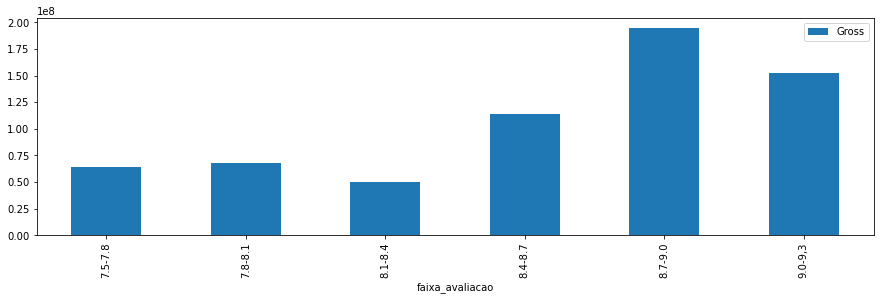

In [126]:
#Analise grafica da informação anterior
pd.pivot_table(df,values='Gross',index=['faixa_avaliacao'],aggfunc='mean').plot(kind='bar')

In [127]:
#Mesmo procedimento para o Meta_score
df['faixa_avaliacao_meta'] = np.nan
df.loc[(pd.to_numeric(df['Meta_score'])>=25) & (pd.to_numeric(df['Meta_score'])<37.5),'faixa_avaliacao_meta'] = '25-37.5'
df.loc[(pd.to_numeric(df['Meta_score'])>=37.5) & (pd.to_numeric(df['Meta_score'])<50),'faixa_avaliacao_meta'] = '37.5-50'
df.loc[(pd.to_numeric(df['Meta_score'])>=50) & (pd.to_numeric(df['Meta_score'])<62.5),'faixa_avaliacao_meta'] = '50-62.5'
df.loc[(pd.to_numeric(df['Meta_score'])>=62.5) & (pd.to_numeric(df['Meta_score'])<75),'faixa_avaliacao_meta'] = '62.5-75'
df.loc[(pd.to_numeric(df['Meta_score'])>=75) & (pd.to_numeric(df['Meta_score'])<87.5),'faixa_avaliacao_meta'] = '75-87.5'
df.loc[(pd.to_numeric(df['Meta_score'])>=87.5),'faixa_avaliacao_meta'] = '87.5-100'

print(df.pivot_table(index='faixa_avaliacao_meta', values='Gross', aggfunc='mean'))

                             Gross
faixa_avaliacao_meta              
25-37.5               4.205261e+07
37.5-50               4.479350e+07
50-62.5               6.186172e+07
62.5-75               8.529539e+07
75-87.5               6.495107e+07
87.5-100              5.937442e+07


<AxesSubplot:xlabel='faixa_avaliacao_meta'>

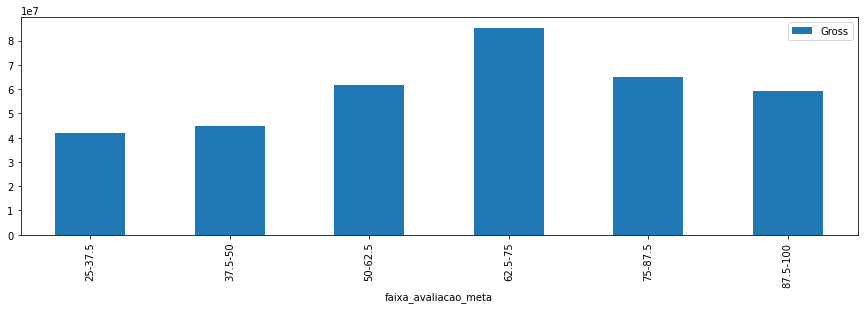

In [128]:
pd.pivot_table(df,values='Gross',index=['faixa_avaliacao_meta'],aggfunc='mean').plot(kind='bar')

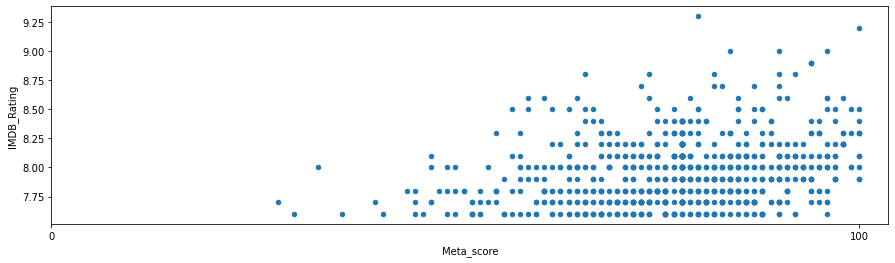

In [129]:
#Relação entre as duas variaveis 
df.plot(x = 'Meta_score', y = 'IMDB_Rating', xticks = [0, 100], kind="scatter");

# Henrique Inacio

## Analise exploratoria tendo como base o ator Tom Hanks

In [130]:
# Usarei o dataset sem a retirada dos valos NaN, pois nao interfere no trabalho

df_full = pd.read_csv('data/imdb_top_1000.csv')

# Retirada de variaveis sem relevancia

columns = ['Poster_Link', 'Overview', 'No_of_Votes']#, 'Star']
df_full = df_full.drop(columns, axis=1)

# Alteracao da variavel Genre para conter somente o primeiro genero

df_full['Genre'] = df_full['Genre'].str.split(', ', expand=True)[0]

# Alteracao da variavel Runtime para retirar o min e tranformar em int

df_full['Runtime'] = df_full['Runtime'].str.split(' ', expand=True)[0]
df_full = df_full.astype({"Runtime":'int'})

In [131]:
# Subset somente do ator Tom Hanks

dfT = df_full.loc[df_full['Star1'] == 'Tom Hanks']
dfT

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,Gross
11,Forrest Gump,1994,UA,142,Drama,8.8,82.0,Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Sally Field,"330,252,182"
24,Saving Private Ryan,1998,R,169,Drama,8.6,91.0,Steven Spielberg,Tom Hanks,Matt Damon,Tom Sizemore,Edward Burns,"216,540,909"
25,The Green Mile,1999,A,189,Crime,8.6,61.0,Frank Darabont,Tom Hanks,Michael Clarke Duncan,David Morse,Bonnie Hunt,"136,801,374"
101,Toy Story,1995,U,81,Animation,8.3,95.0,John Lasseter,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,"191,796,233"
151,Toy Story 3,2010,U,103,Animation,8.2,92.0,Lee Unkrich,Tom Hanks,Tim Allen,Joan Cusack,Ned Beatty,"415,004,880"
596,Toy Story 4,2019,U,100,Animation,7.8,84.0,Josh Cooley,Tom Hanks,Tim Allen,Annie Potts,Tony Hale,"434,038,008"
604,Captain Phillips,2013,UA,134,Adventure,7.8,82.0,Paul Greengrass,Tom Hanks,Barkhad Abdi,Barkhad Abdirahman,Catherine Keener,"107,100,855"
647,Cast Away,2000,UA,143,Adventure,7.8,73.0,Robert Zemeckis,Tom Hanks,Helen Hunt,Paul Sanchez,Lari White,"233,632,142"
791,Road to Perdition,2002,A,117,Crime,7.7,72.0,Sam Mendes,Tom Hanks,Tyler Hoechlin,Rob Maxey,Liam Aiken,"104,454,762"
818,Philadelphia,1993,UA,125,Drama,7.7,66.0,Jonathan Demme,Tom Hanks,Denzel Washington,Roberta Maxwell,Buzz Kilman,"77,324,422"


In [132]:
# Genero dos filmes que o ator atuou

df_full[df_full['Star1'] == "Tom Hanks"].value_counts().groupby('Genre').count()

Genre
Adventure    3
Animation    3
Crime        2
Drama        4
dtype: int64

<AxesSubplot:>

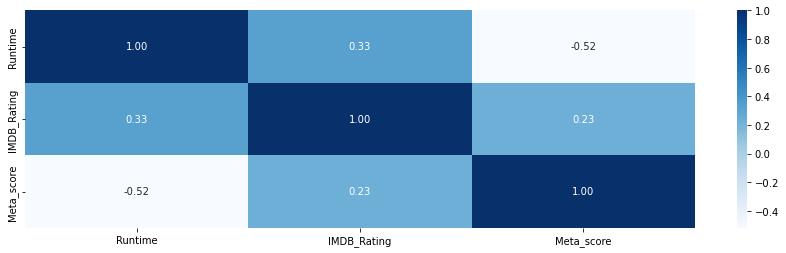

In [133]:
# Tabela de correlacao
dfCorr = dfT.corr()
sns.heatmap(dfCorr, cmap = 'Blues', annot = True, fmt = '.2f')

In [134]:
# Media da avaliacao do IMDB dos atores

df_full.groupby('Star1').agg({'IMDB_Rating':'mean'}).sort_values(by='IMDB_Rating', ascending=False)[:15]

,IMDB_Rating
Star1,
Tim Robbins,9.300000
John Travolta,8.900000
Elijah Wood,8.800000
Lilly Wachowski,8.700000
Marlon Brando,8.650000
Suriya,8.600000
Lin-Manuel Miranda,8.600000
Kátia Lund,8.600000
Jodie Foster,8.600000


In [135]:
# Soma da duracao dos filmes de cada ator

df_full.groupby('Star1').agg({'Runtime':sum}).sort_values(by='Runtime', ascending=False)[:15]

,Runtime
Star1,
Robert De Niro,1686
Tom Hanks,1585
Al Pacino,1486
Leonardo DiCaprio,1412
Clint Eastwood,1266
Aamir Khan,1218
Christian Bale,1071
Denzel Washington,1015
James Stewart,967


# Matheus Rocha

### Análise exploratória com as colunas Genre e Certificate

In [136]:
# Uso do conjunto de dados por inteiro, pois as alterações feitas anteriormente influêciam a análise

df = pd.read_csv("data/imdb_top_1000.csv")
df.drop(["Poster_Link", "Overview"], axis=1, inplace=True)
df["Gross"] = df.loc[~df["Gross"].isnull(), "Gross"].apply(lambda x: x.replace(",", '')).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    float64
dtypes: float64(3), int64(1), object(10)
memory usage: 109.5+ KB


In [137]:
# Um total de 286 linhas que apresentam algum valor NaN

df[df.isna().any(axis=1)]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
18,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.6,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,NaN
20,Soorarai Pottru,2020,U,153 min,Drama,8.6,NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
30,Seppuku,1962,NaN,133 min,"Action, Drama, Mystery",8.6,85.0,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,NaN
32,It's a Wonderful Life,1946,PG,130 min,"Drama, Family, Fantasy",8.6,89.0,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,NaN
46,Hotaru no haka,1988,U,89 min,"Animation, Drama, War",8.5,94.0,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Blowup,1966,A,111 min,"Drama, Mystery, Thriller",7.6,82.0,Michelangelo Antonioni,David Hemmings,Vanessa Redgrave,Sarah Miles,John Castle,56513,NaN
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [138]:
# Estas serão desconsideradas para a analise, nos casos das colunas Certificate, que tem carater
# qualitativo e não podem ser facilmente tratadas, e da coluna Gross
df.dropna(subset=["Certificate", "Gross"], inplace=True)

In [139]:
# Número de gêneros avaliados ao total

df["Genre"].nunique()

178

In [140]:
# Cada linh é uma string, assim, filmes com mais de um gênero são interpretados como um gênero diferente

print((df["Genre"][1]))

Crime, Drama


In [141]:
# Convertendo os gêneros para um lista de gêneros

df["Genre"] = df["Genre"].apply(lambda x: (x.split(", ")))

In [142]:
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,[Drama],9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"[Crime, Drama]",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"[Action, Crime, Drama]",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"[Crime, Drama]",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"[Crime, Drama]",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,PG,157 min,"[Drama, War, Western]",7.6,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690.0
991,Kelly's Heroes,1970,GP,144 min,"[Adventure, Comedy, War]",7.6,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435.0
992,The Jungle Book,1967,U,78 min,"[Animation, Adventure, Family]",7.6,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612.0
994,A Hard Day's Night,1964,U,87 min,"[Comedy, Music, Musical]",7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024.0


In [143]:
# Número de gêneros distintos

generos = []
for genre_list in df["Genre"]:
    for genre in genre_list:
        generos.append(genre)
        
generos_serie = pd.Series(generos)

In [144]:
print(len(generos_serie))
print(generos_serie.nunique())
generos_serie.unique()

2010
21


array(['Drama', 'Crime', 'Action', 'Adventure', 'Biography', 'History',
       'Sci-Fi', 'Romance', 'Western', 'Fantasy', 'Comedy', 'Thriller',
       'Animation', 'Family', 'War', 'Mystery', 'Music', 'Horror',
       'Sport', 'Musical', 'Film-Noir'], dtype=object)

### Quais os gêneros mais comuns para esse conjunto de dados


<AxesSubplot:>

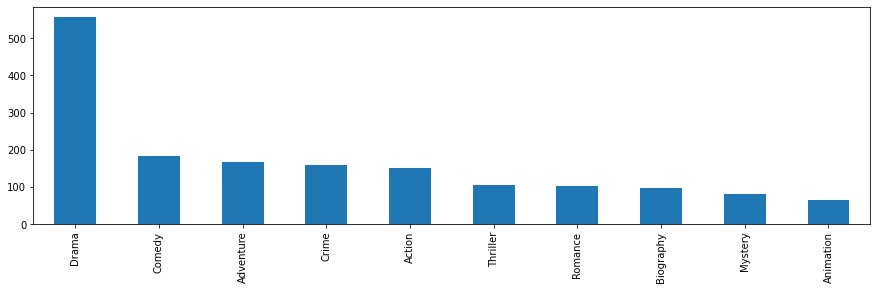

In [145]:
generos_serie.value_counts().head(10).plot(kind="bar")

In [146]:
generos_serie.value_counts().head(10)

Drama        557
Comedy       184
Adventure    168
Crime        160
Action       152
Thriller     104
Romance      101
Biography     96
Mystery       81
Animation     66
dtype: int64

### Hipótese: Filmes com certificação U, ou UA possuem arrecadação maior que filmes com certificação A.

In [147]:
print(df["Certificate"].value_counts().head(3), end="\n\n")
print(df["Certificate"].value_counts().head(3).sum() / df["Certificate"].value_counts().sum())

U     200
A     180
UA    163
Name: Certificate, dtype: int64

0.6917197452229299


In [148]:
print(df[df["Certificate"] == "U"]["Gross"].sum() / df["Gross"].sum())
print(df[df["Certificate"] == "UA"]["Gross"].sum() / df["Gross"].sum())
print(df[df["Certificate"] == "A"]["Gross"].sum() / df["Gross"].sum())

0.3095566543272738
0.37923135354624093
0.20400820580904455


De fato, a hipótese é verificada,entretanto, filmes com classificação indicatica A ainda assim são responsáveis por pouco mais que 20% da Arrecadação total do conjunto de dados, mesmo não sendo este uma maioria. O esperado era um valor relativo menor do que o apresentado, afinal, filmes adultos, não são a maioria, e aprensetam parcela de público potencialmente menor.

### Hipótese: Os filmes de gênero Crime, Thriller, Horror, War, Noir são filmes com certificação A, em sua maioria.

In [149]:
# Função que retorna se existe alguma interseção entre os gêneros de um dado filme e os gêneros de interesse.

def interseccao(x, s2):
    if set(x) & set(s2):
        return True
    else: 
        return False

In [150]:
generos_interesse = ["Crime", "Thriller", "Horror", "War", "Film-Noir"]

df_hipotese_2 = df[df["Genre"].apply(lambda x: interseccao(x, generos_interesse))]
df_hipotese_2

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"[Crime, Drama]",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"[Action, Crime, Drama]",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"[Crime, Drama]",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"[Crime, Drama]",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
6,Pulp Fiction,1994,A,154 min,"[Crime, Drama]",8.9,94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,Midnight Express,1978,A,121 min,"[Biography, Crime, Drama]",7.6,59.0,Alan Parker,Brad Davis,Irene Miracle,Bo Hopkins,Paolo Bonacelli,73662,35000000.0
989,The Long Goodbye,1973,A,112 min,"[Comedy, Crime, Drama]",7.6,87.0,Robert Altman,Elliott Gould,Nina van Pallandt,Sterling Hayden,Mark Rydell,26337,959000.0
990,Giù la testa,1971,PG,157 min,"[Drama, War, Western]",7.6,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690.0
991,Kelly's Heroes,1970,GP,144 min,"[Adventure, Comedy, War]",7.6,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435.0


In [151]:
df_hipotese_2["Certificate"].value_counts()

A           105
R            62
UA           52
U            29
Passed        9
PG            6
PG-13         4
Approved      3
GP            2
U/A           1
Name: Certificate, dtype: int64

In [152]:
# Em termos percentuais

df_hipotese_2['Certificate'][df_hipotese_2["Certificate"] == "A"].value_counts() / df['Certificate'][df["Certificate"] == "A"].value_counts()

A    0.583333
Name: Certificate, dtype: float64

A hipótese é verificada, é possivel observar ainda, que dos 180 filmes que apresentam certificação A, observados no item anterior, 105 pertencem a algum desses gêneros listados na lista **generos_interesse**, pouco enos de 60%.